# Data and package

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000

#model
import xgboost as xgb

/home/peiran/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# data

In [32]:
train = pd.read_csv("../Data/blogData_train.csv",header=None)
test = pd.read_csv("../Data/blogData_test.csv",header=None)

# rename
names = ["V%i" % i if i != 281 else "y" for i in range(1,282)]
train.columns = names
test.columns = names

# split
X_train = train.ix[:,"V1":"V280"]
y_train = train["y"]

X_test = test.ix[:,"V1":"V280"]
y_test = test["y"]

y_train_log = np.log(train["y"]+1)
y_test_log = np.log(test["y"]+1)

# Evaluation

In [33]:
def eva(test_pred, test_real):
    return ((test_real-test_pred)**2).mean()

# Feature transformation and feature engineering

In [34]:
group = [[1,6,11,16,21],
        [2,7,12,17,22],
        [3,8,13,18,23],
        [4,9,14,19,24],
        [5,10,15,20,25],
        [26,31,36,41,46],
        [27,32,37,42,47],
        [28,33,38,43,48],
        [29,34,39,44,49],
        [30,35,40,45,50],
        [51,52,53,54,55],
        [56,57,58,59,60],
        [61,62],
        list(range(63,263)),
        [263,264,265,266,267,268,269],
        [270,271,272,273,274,275,276],
        [277,278,279,280]]

# remove_col = np.arange(63,263)
# remove_column = ["V%i" % i for i in remove_col]
# newXTrain = X_train.drop(remove_column,axis=1)
# newXTest = X_test.drop(remove_column,axis=1)

drop_group = [5,7,6,9,1,2,8,13]
remove_col = []
for i in drop_group:
    remove_col += group[i]
remove_col = ['V'+str(x) for x in remove_col]
newXTrain = X_train.drop(remove_col, axis=1)
newXTest = X_test.drop(remove_col, axis=1)

# 52/51
# N1_train = newXTrain["V52"].as_matrix()/newXTrain["V51"].as_matrix()
# N1_test = newXTest["V52"].as_matrix()/newXTest["V51"].as_matrix()
# newXTrain["N1"] = N1_train
# newXTest["N1"] = N1_test

#53/51
N2_train = newXTrain["V53"].as_matrix()/newXTrain["V51"].as_matrix()
N2_test = newXTest["V53"].as_matrix()/newXTest["V51"].as_matrix()
newXTrain["N2"] = N2_train
newXTest["N2"] = N2_test

#54/51
N3_train = newXTrain["V54"].as_matrix()/newXTrain["V51"].as_matrix()
N3_test = newXTest["V54"].as_matrix()/newXTest["V51"].as_matrix()
newXTrain["N3"] = N3_train
newXTest["N3"] = N3_test


#52/53
N4_train = newXTrain["V53"].as_matrix()/newXTrain["V52"].as_matrix()
N4_test = newXTest["V53"].as_matrix()/newXTest["V52"].as_matrix()
newXTrain["N4"] = N4_train
newXTest["N4"] = N4_test

#54/51
N5_train = newXTrain["V52"].as_matrix()/newXTrain["V54"].as_matrix()
N5_test = newXTest["V52"].as_matrix()/newXTest["V54"].as_matrix()
newXTrain["N5"] = N5_train
newXTest["N5"] = N5_test

# 57/56
N6_train = newXTrain["V57"].as_matrix()/newXTrain["V56"].as_matrix()
N6_test = newXTest["V57"].as_matrix()/newXTest["V56"].as_matrix()
newXTrain["N6"] = N6_train
newXTest["N6"] = N6_test

#58/56
N7_train = newXTrain["V58"].as_matrix()/newXTrain["V56"].as_matrix()
N7_test = newXTest["V58"].as_matrix()/newXTest["V56"].as_matrix()
newXTrain["N7"] = N7_train
newXTest["N7"] = N7_test

#59/56
N8_train = newXTrain["V59"].as_matrix()/newXTrain["V56"].as_matrix()
N8_test = newXTest["V59"].as_matrix()/newXTest["V56"].as_matrix()
newXTrain["N8"] = N8_train
newXTest["N8"] = N8_test

#57/58
N9_train = newXTrain["V57"].as_matrix()/newXTrain["V58"].as_matrix()
N9_test = newXTest["V57"].as_matrix()/newXTest["V58"].as_matrix()
newXTrain["N9"] = N9_train
newXTest["N9"] = N9_test

#59/56
N10_train = newXTrain["V59"].as_matrix()/newXTrain["V56"].as_matrix()
N10_test = newXTest["V59"].as_matrix()/newXTest["V56"].as_matrix()
newXTrain["N10"] = N10_train
newXTest["N10"] = N10_test

# 61 <> 24
N11_train = (newXTrain["V61"].as_matrix()>24)*1
N11_test = (newXTest["V61"].as_matrix()>24)*1
newXTrain["N11"] = N11_train
newXTest["N11"] = N11_test

# 62/61
N12_train = newXTrain["V62"].as_matrix()/newXTrain["V61"].as_matrix()
N12_test = newXTest["V62"].as_matrix()/newXTest["V61"].as_matrix()
newXTrain["N12"] = N12_train
newXTest["N12"] = N12_test
# 1 -> weekend, 1 -> weekday
pubWeekendTrain = newXTrain.ix[:,"V268":"V269"].apply(lambda x:x.sum(),axis = 1)
pubWeekendTest = newXTest.ix[:,"V268":"V269"].apply(lambda x:x.sum(),axis = 1)

# 1 -> weekend, 1 -> weekday
bsWeekendTrain = newXTrain.ix[:,"V275":"V276"].apply(lambda x:x.sum(),axis = 1)
bsWeekendTest = newXTest.ix[:,"V275":"V276"].apply(lambda x:x.sum(),axis = 1)

pubBsDayTrain = pd.concat([pubWeekendTrain,bsWeekendTrain],axis=1)
pubBsDayTest = pd.concat([pubWeekendTest,bsWeekendTest],axis=1)

N13_train = pubBsDayTrain.apply(lambda x: ((x[0]==1) & (x[1]==1))*1, axis=1)
N14_train = pubBsDayTrain.apply(lambda x: ((x[0]==1) & (x[1]==0))*1, axis=1)
N15_train = pubBsDayTrain.apply(lambda x: ((x[0]==0) & (x[1]==1))*1, axis=1)
N16_train = pubBsDayTrain.apply(lambda x: ((x[0]==0) & (x[1]==0))*1, axis=1)

N13_test = pubBsDayTest.apply(lambda x: ((x[0]==1) & (x[1]==1))*1, axis=1)
N14_test = pubBsDayTest.apply(lambda x: ((x[0]==1) & (x[1]==0))*1, axis=1)
N15_test = pubBsDayTest.apply(lambda x: ((x[0]==0) & (x[1]==1))*1, axis=1)
N16_test = pubBsDayTest.apply(lambda x: ((x[0]==0) & (x[1]==0))*1, axis=1)

newXTrain["N13"] = N13_train
newXTest["N13"] = N13_test

newXTrain["N14"] = N14_train
newXTest["N14"] = N14_test

newXTrain["N15"] = N15_train
newXTest["N15"] = N15_test

newXTrain["N16"] = N16_train
newXTest["N16"] = N16_test

newXTrain = newXTrain.fillna(-1)
newXTest = newXTest.fillna(-1)

newXTrain = newXTrain.replace([np.inf, -np.inf], 10000)
newXTest = newXTest.replace([np.inf, -np.inf], 10000)

# adding interactions
f = open("../Data/add_interaction.txt", "r")
for inter_var in f.readlines():
    inter_var = inter_var.strip()
    new_col_name = inter_var
    inter_var = inter_var.split('_')
    # add new column for train data
    X_train_new_col =newXTrain[inter_var[0]]
    for var in inter_var[1:]:
        X_train_new_col = X_train_new_col * newXTrain[var]
    newXTrain[new_col_name] = X_train_new_col
    # add new column for test data
    X_test_new_col = newXTest[inter_var[0]]
    for var in inter_var[1:]:
        X_test_new_col = X_test_new_col * newXTest[var]
    newXTest[new_col_name] = X_test_new_col
f.close()

# Model Experiment

### Gradient Boosting tree

In [10]:
RANDOM_STATE = 42

params = {
    'min_child_weight': 1,
    'eta': 0.01,
    'colsample_bytree': 1,
    'max_depth': 12,
    'subsample': 0.2,
    'reg_alpha': 1,
    'gamma': 0.04,
    'silent':True,
#     "verbose_eval":10,
#     "eval_metric":"rmse",
    'seed': RANDOM_STATE
}

# data preparation and model training 
xgtrain = xgb.DMatrix(newXTrain, label=y_train_log)
xgval = xgb.DMatrix(newXTest, label=y_test_log)
xgtest = xgb.DMatrix(newXTest)
# xgtrain = xgb.DMatrix(X_train, label=y_train_log)
# xgtest = xgb.DMatrix(X_test)
gb_model = xgb.train(params,
                     num_boost_round = 450,
                     dtrain=xgtrain, 
#                      obj=fair_obj,
                     evals=[(xgval,"validation")], 
                     early_stopping_rounds = 40
                     )
# model prediction and evaluation
gb_pred = gb_model.predict(xgtest)

In [41]:
eva(gb_pred,y_test_log.as_matrix())

0.37127636128989144

Generating the loss curve

In [9]:
gb_test_pred = []
ntree = 600
for i in range(1,ntree+1):
    gb_pred = gb_model.predict(xgb.DMatrix(newXTest),ntree_limit=i)
    gb_test_pred.append(eva(gb_pred,y_test_log.as_matrix()))

gb_train_pred = []
for i in range(1,ntree+1):
    gb_pred = gb_model.predict(xgb.DMatrix(newXTrain),ntree_limit=i)
    gb_train_pred.append(eva(gb_pred,y_train_log.as_matrix()))

gb_nofeature_pred = []
ntree = 600
for i in range(1,ntree+1):
    gb_pred = gb_model.predict(xgb.DMatrix(X_test),ntree_limit=i)
    gb_nofeature_pred.append(eva(gb_pred,y_test_log.as_matrix()))

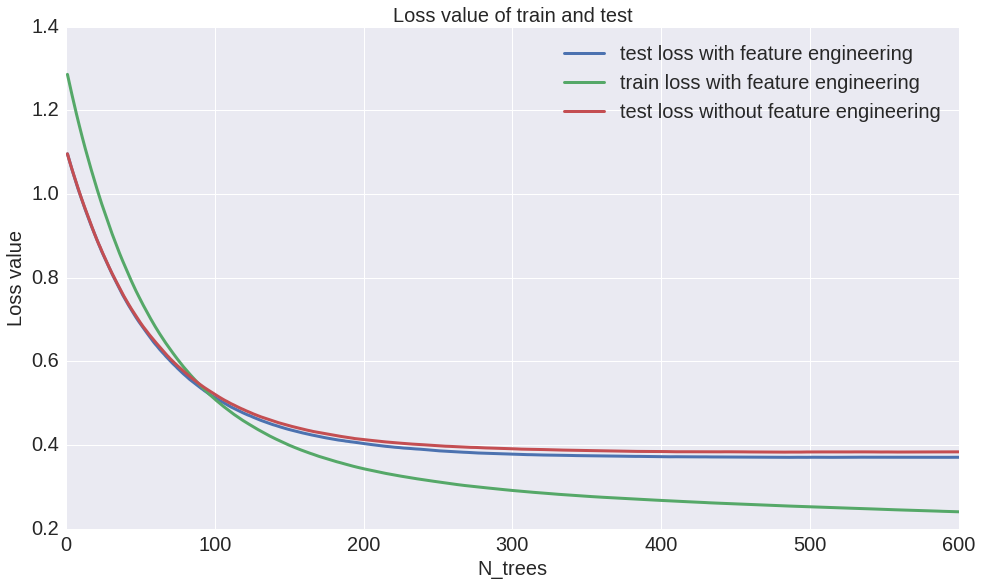

In [33]:
# plot evaluation
plt.figure(figsize=(16,9))
plt.plot(range(1,ntree+1),gb_test_pred,label = "test loss with feature engineering",lw=3);
plt.plot(range(1,ntree+1),gb_train_pred,label = "train loss with feature engineering",lw=3);
plt.plot(range(1,ntree+1),gb_nofeature_pred,label = "test loss without feature engineering",lw=3);
plt.legend(fontsize=20);
plt.title("Loss value of train and test", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("N_trees", fontsize=20);
plt.ylabel("Loss value", fontsize=20);
plt.savefig("/home/peiran/Semester3/STAT542/Project/Report/loss_value.png");

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

# parameters
params = {
    "n_estimators":1000,
    "criterion":'mse',
    "max_depth":12,
    "max_features":"auto",
    "min_samples_split":2,
    "min_impurity_split":0.01,
    "n_jobs":-1,
    "random_state":42,
    "verbose":3,
}

rft_model = RandomForestRegressor(**params)
rft_model.fit(newXTrain,y_train_log)
rft_pred = rft_model.predict(newXTest)

In [8]:
eva(rft_pred, y_test_log)

0.38756546532578917

Feature importance

In [6]:
importance = rft_model.feature_importances_
features = newXTrain.columns

In [7]:
def plot_30_importance(importance,features):
    imp_table = pd.DataFrame({"importance":importance,"features":features})
    imp_10_table = imp_table.sort_values(ascending = False,by="importance")[0:30]
    sns.barplot(x=imp_10_table["features"],y=imp_10_table["importance"],color="black")

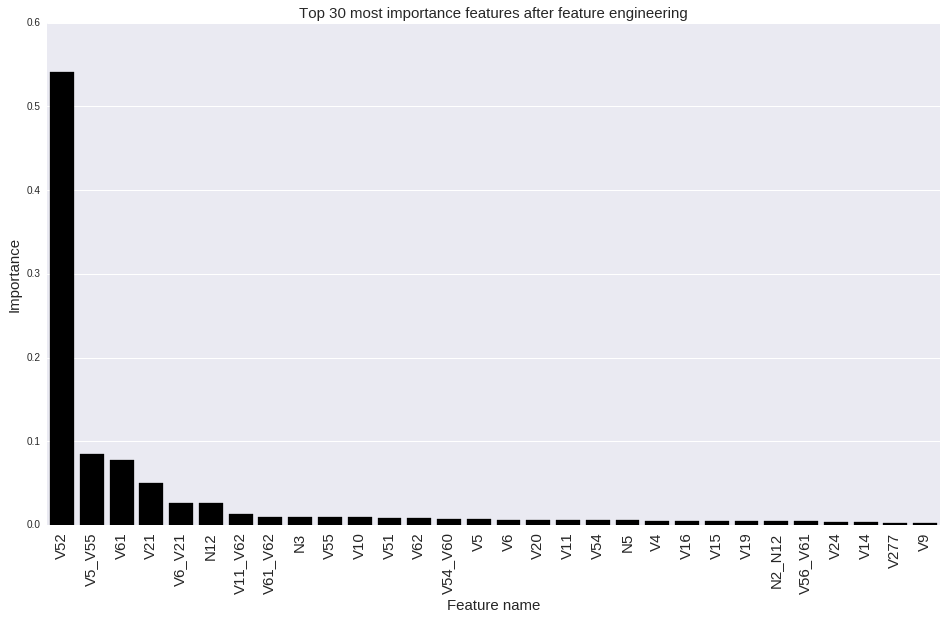

In [8]:
plt.figure(figsize = (16,9))
plot_30_importance(importance,features)
plt.title("Top 30 most importance features after feature engineering",fontsize=15);
plt.xlabel("Feature name",fontsize=15);
plt.ylabel("Importance",fontsize=15);
plt.xticks(rotation='vertical',fontsize=15);
plt.savefig("/home/peiran/Semester3/STAT542/Project/Report/rft_importance_final.png");

### KNN

In [9]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=20,n_jobs=-1)
neigh.fit(newXTrain, y_train_log) 
knn_pred = neigh.predict(newXTest)

In [10]:
eva(knn_pred, y_test_log)

0.6323957871770662

### Neural Network

In [28]:
# keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1,l2
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import PReLU
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical

Neural network architecture

In [29]:
def NN():
    model = Sequential()
    model.add(Dense(512,init = 'he_normal',input_shape = [newXTrain.shape[1],]))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(0.4))
    
    model.add(Dense(256, init = 'he_normal')) 
    model.add(BatchNormalization())  
    model.add(PReLU()) 
    model.add(Dropout(0.2))
    
    model.add(Dense(256, init = 'he_normal')) 
    model.add(BatchNormalization())  
    model.add(PReLU()) 
    model.add(Dropout(0.2))

    model.add(Dense(50, init = 'he_normal')) 
    model.add(BatchNormalization())
    model.add(PReLU())  
    
    model.add(Dense(1, init='he_normal'))
    model.compile(loss='mean_squared_error', optimizer = "adadelta")
    return(model)

Neural network fitting 

The model is fitted on all the features without the interaction items and word features

In [38]:
model = NN()
nepochs = 1000
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

model.fit(newXTrain.as_matrix(), y_train_log, validation_data = (newXTest.as_matrix(),y_test_log)
          , nb_epoch=nepochs, batch_size=300,callbacks=[early_stopping])

evaluation

In [37]:
nn_pred = model.predict(newXTest.as_matrix()).reshape(-1)
eva(nn_pred, y_test_log)

# Model Ensemble

In [1]:
from sklearn.cross_validation import KFold
## cv-folds
nfolds = 8
folds = KFold(len(y_train_log), n_folds = nfolds, shuffle = True, random_state = 42)

model_group = []
pred = []

for (Tr, Te) in folds:
    train_x = newXTrain.ix[Tr,:]
    train_y = y_train_log[Tr]
    test_x = newXTrain.ix[Te,:]
    test_y = y_train_log[Te]
    
    params = {
    'min_child_weight': 1,
    'eta': 0.01,
    'colsample_bytree': 1,
    'max_depth': 12,
    'subsample': 0.2,
    'reg_alpha': 1,
    'gamma': 0.04,
    'silent':True,
    "eval_metric":"rmse"}
    
    xgtrain = xgb.DMatrix(train_x, label=train_y)
    xgtest = xgb.DMatrix(newXTest)
    xgval = xgb.DMatrix(test_x, label=test_y)
    gb_model = xgb.train(params, 
                     dtrain=xgtrain, 
                     verbose_eval = 50,
                     evals=[(xgval,"validation")], 
                     early_stopping_rounds = 30,
                     num_boost_round = 2000)

    # model prediction and evaluation
    gb_pred = gb_model.predict(xgtest)
    # model will stop if overfit on the test data
    pred.append(gb_pred)
    model_group.append(gb_model)

evaluation

In [47]:
gb_pred = np.array(pred).mean(0)
eva(gb_pred,y_test_log)

0.3698531053293141